In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart (1).csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.shape

(302, 14)

In [12]:
df.value_counts('target')

target
1    164
0    138
dtype: int64

<AxesSubplot:>

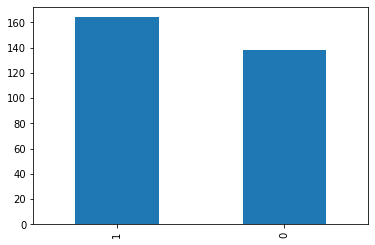

In [13]:
df['target'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='target', ylabel='count'>

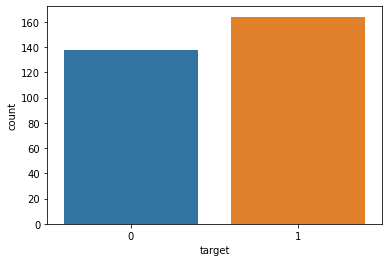

In [14]:
sns.countplot(df['target'])

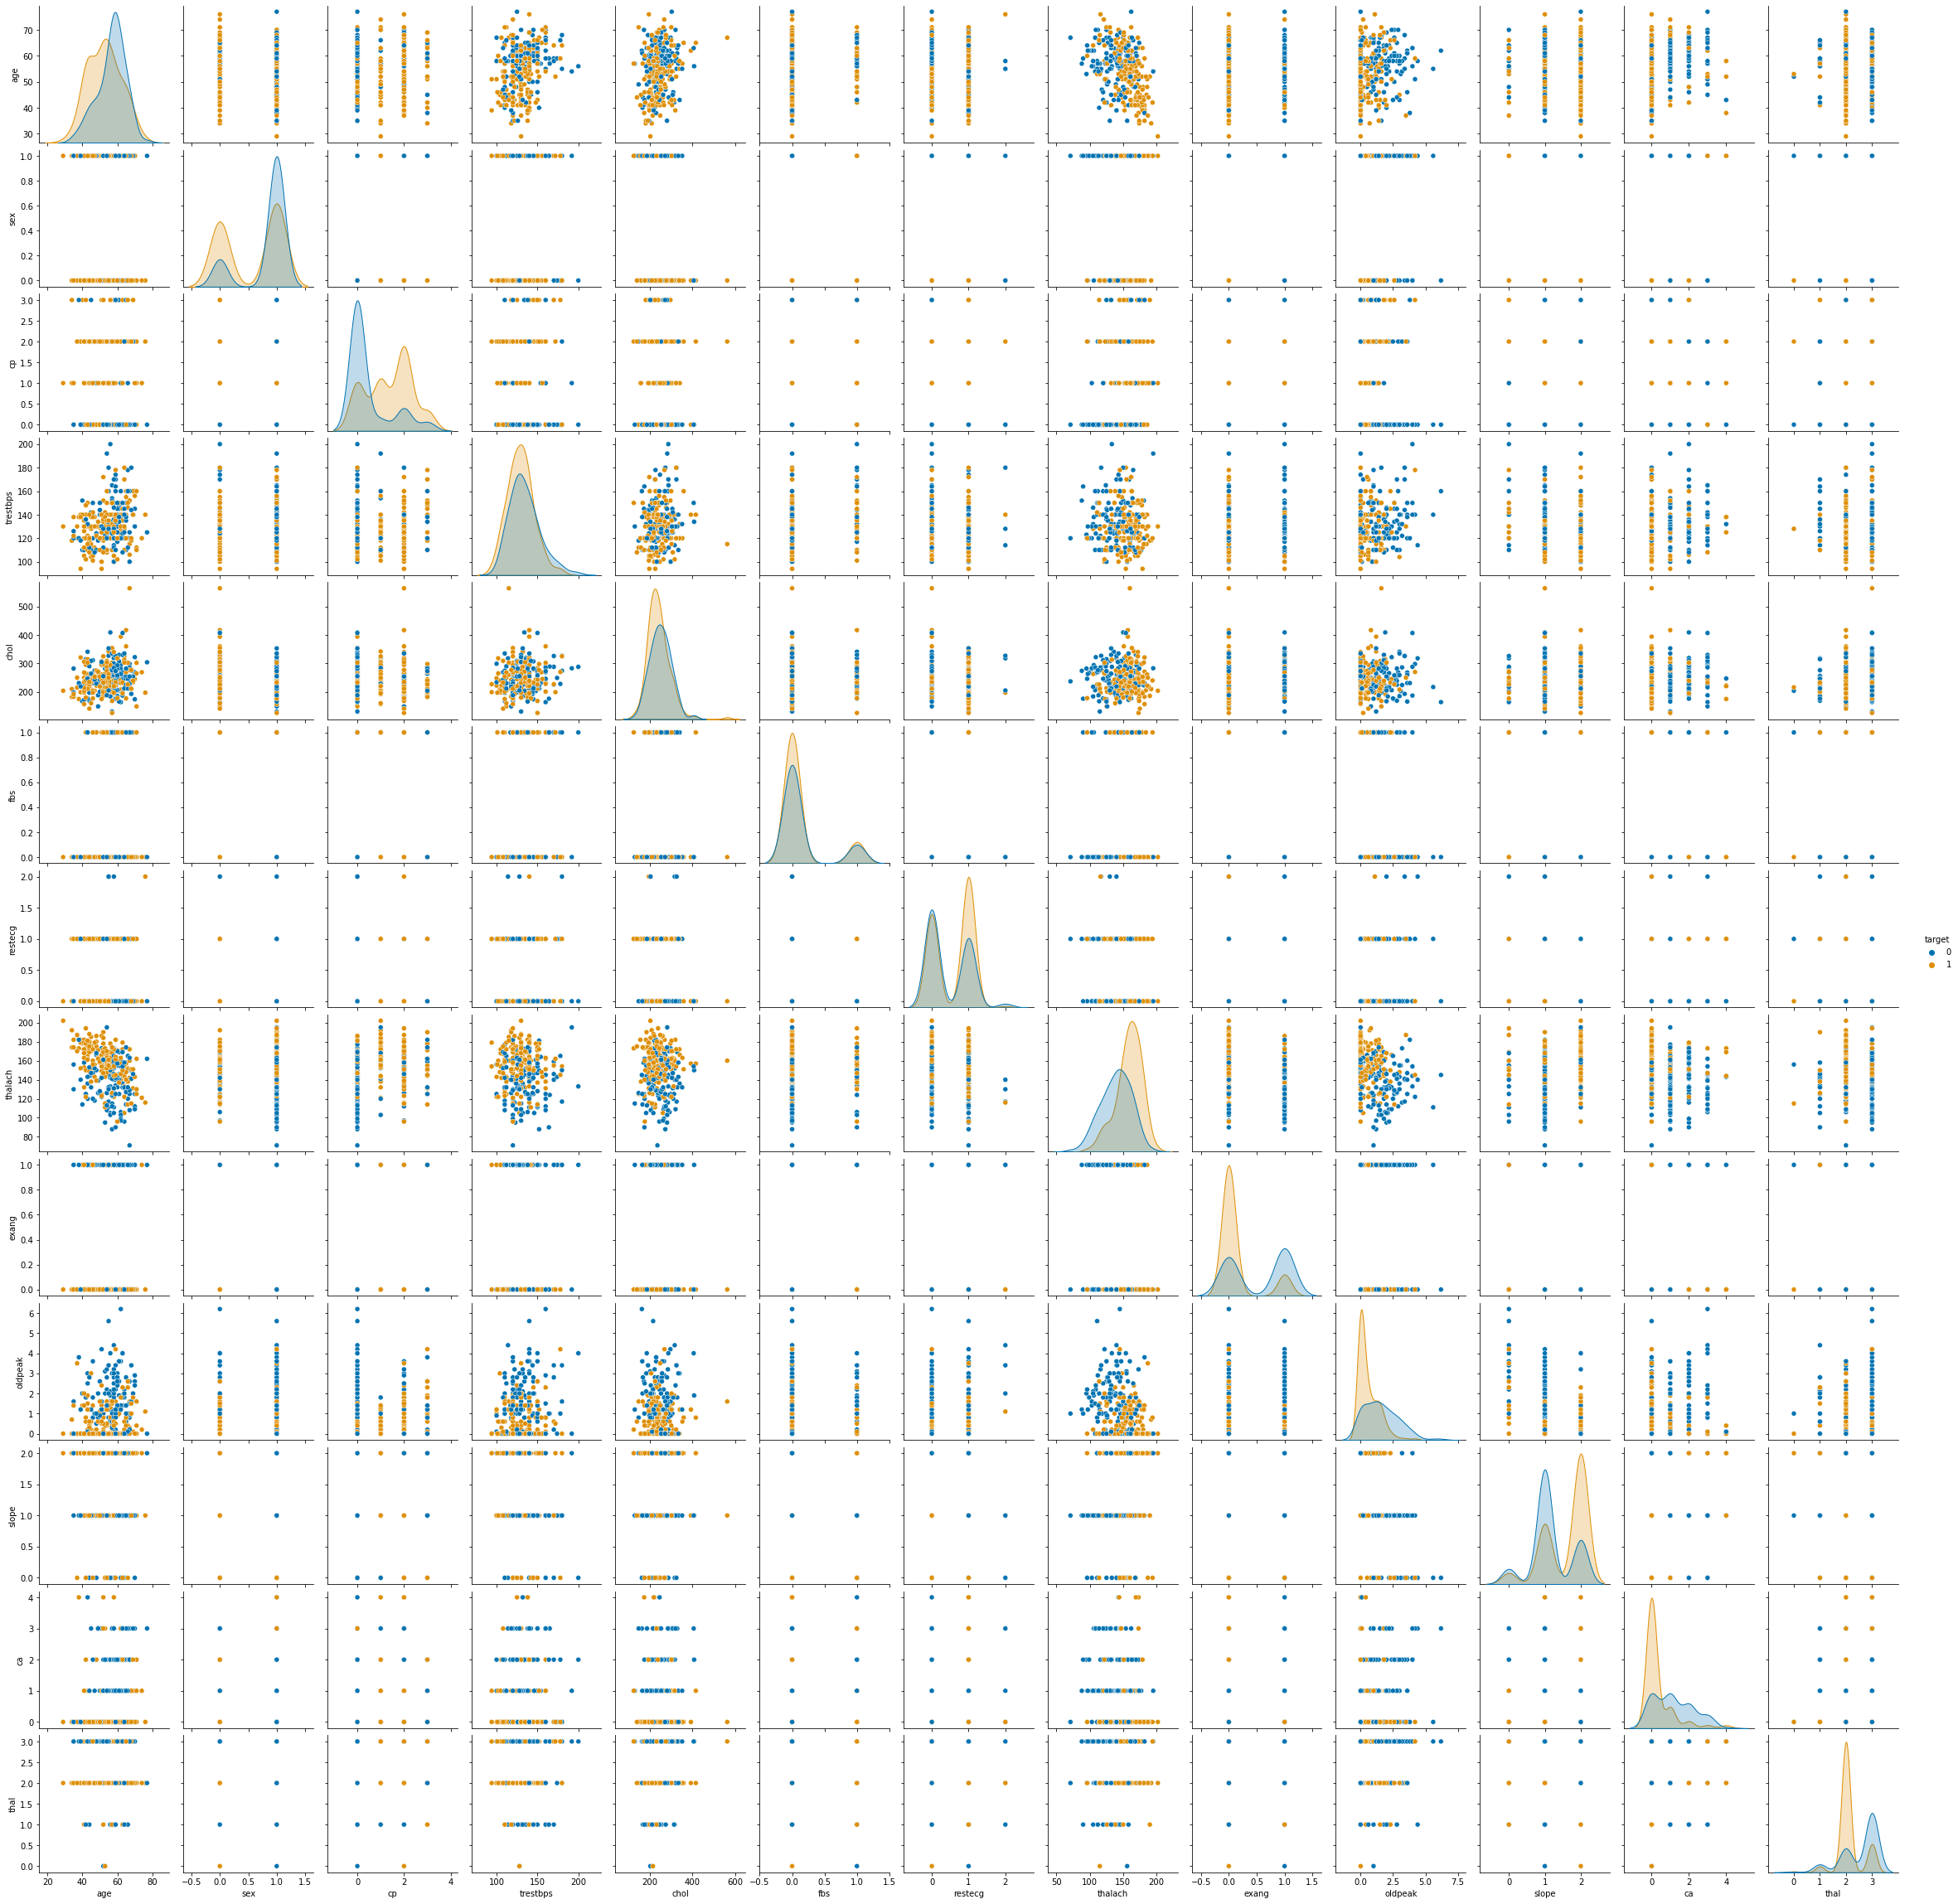

In [15]:
sns.pairplot(hue= 'target', data = df, palette = 'colorblind')

In [16]:
x = df.drop('target',axis=1)

In [17]:
y = df['target']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=101)

In [19]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2
720,64,1,2,140,335,0,1,158,0,0.0,2,0,2
129,57,1,0,140,192,0,1,148,0,0.4,1,0,1
62,67,1,0,100,299,0,0,125,1,0.9,1,2,2
39,57,1,2,128,229,0,0,150,0,0.4,1,1,3


In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [21]:
x_train1 = ss.fit_transform(x_train)
x_test1 = ss.fit_transform(x_test)

In [22]:
x_train1

array([[ 1.27024111,  0.70459485, -0.90984833, ...,  0.96318322,
         0.29593524, -0.52317786],
       [ 1.05100113,  0.70459485,  1.04911083, ...,  0.96318322,
        -0.72770962, -0.52317786],
       [ 0.2836612 ,  0.70459485, -0.90984833, ..., -0.58820349,
        -0.72770962, -2.1230406 ],
       ...,
       [-1.25101865, -1.41925534,  1.04911083, ..., -0.58820349,
        -0.72770962, -0.52317786],
       [ 0.83176115, -1.41925534, -0.90984833, ..., -2.13959021,
         2.34322497,  1.07668487],
       [-1.25101865, -1.41925534, -0.90984833, ..., -0.58820349,
        -0.72770962,  1.07668487]])

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
lr.fit(x_train1,y_train)

LogisticRegression()

In [25]:
lr_pred = lr.predict(x_test1)

In [26]:
lr_pred 

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  


In [28]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        39
           1       0.84      0.79      0.81        52

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [29]:
cm1 = confusion_matrix(y_test,lr_pred)

Text(42.0, 0.5, 'Truth')

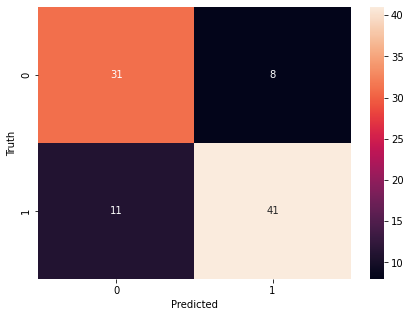

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
print(accuracy_score(y_test,lr_pred))

0.7912087912087912


# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train1,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_pred = knn.predict(x_test1)

In [34]:
knn_pred 

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [35]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.88      0.85      0.86        52

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.85      0.85      0.85        91



In [36]:
cm2 = (confusion_matrix(y_test,knn_pred))

Text(42.0, 0.5, 'Truth')

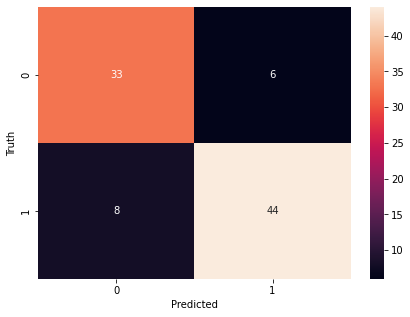

In [37]:
plt.figure(figsize=(7,5))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
print(accuracy_score(y_test,knn_pred))

0.8461538461538461


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtc.fit(x_train1,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [40]:
dtc_pred = dtc.predict(x_test1)

In [41]:
dtc_pred 

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [42]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76        39
           1       0.83      0.77      0.80        52

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



In [43]:
cm3 = confusion_matrix(y_test,dtc_pred)

Text(42.0, 0.5, 'Truth')

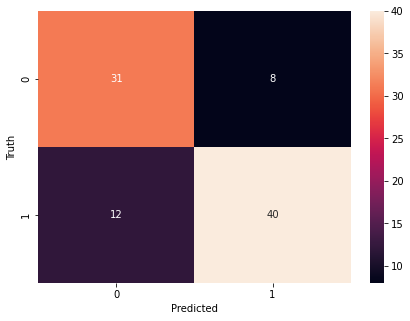

In [44]:
plt.figure(figsize=(7,5))
sns.heatmap(cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
print(accuracy_score(y_test,dtc_pred))

0.7802197802197802


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=3, criterion='entropy',random_state=1)
rfc.fit(x_train1,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3, random_state=1)

In [47]:
rfc_pred = rfc.predict(x_test1)

In [48]:
rfc_pred 

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        39
           1       0.78      0.81      0.79        52

    accuracy                           0.76        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



In [50]:
cm4 = confusion_matrix(y_test,rfc_pred)

Text(42.0, 0.5, 'Truth')

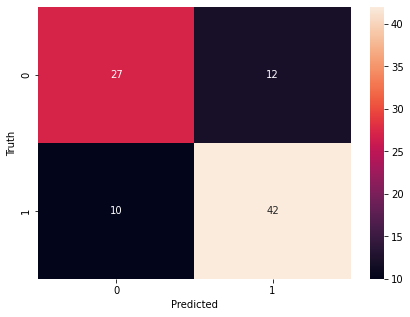

In [51]:
plt.figure(figsize=(7,5))
sns.heatmap(cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
print(accuracy_score(y_test,rfc_pred))

0.7582417582417582


# SVM

In [53]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train1,y_train)

SVC()

In [54]:
svc_pred = svc.predict(x_test1)

In [55]:
svc_pred 

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [56]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.84      0.83      0.83        52

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [57]:
cm5 = confusion_matrix(y_test,svc_pred)

Text(42.0, 0.5, 'Truth')

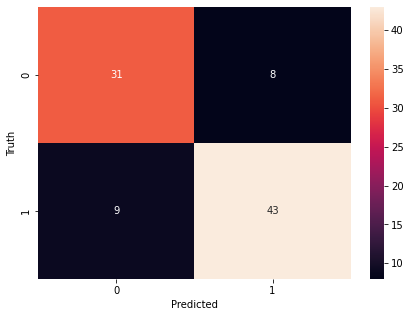

In [58]:
plt.figure(figsize=(7,5))
sns.heatmap(cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
print(accuracy_score(y_test,svc_pred))

0.8131868131868132


# XGBoost

In [60]:
import xgboost
from xgboost import XGBClassifier

In [61]:
xb = XGBClassifier()
xb.fit(x_train1,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
xb_pred = xb.predict(x_test1)

In [63]:
xb_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0])

In [64]:
print(classification_report(y_test,xb_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.86      0.83      0.84        52

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [65]:
cm6 = confusion_matrix(y_test,xb_pred)

Text(42.0, 0.5, 'Truth')

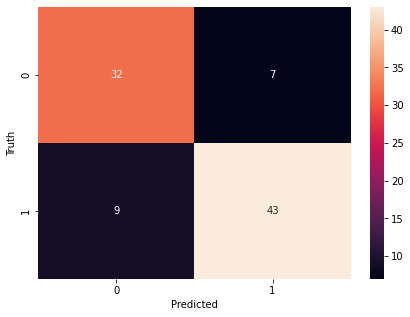

In [66]:
plt.figure(figsize=(7,5))
sns.heatmap(cm6,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
print(accuracy_score(y_test,xb_pred))

0.8241758241758241


# AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train1,y_train)

AdaBoostClassifier()

In [69]:
ab_pred = ab.predict(x_test1)

In [70]:
ab_pred 

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [71]:
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        39
           1       0.82      0.81      0.82        52

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [72]:
cm7 = confusion_matrix(y_test,ab_pred)

Text(42.0, 0.5, 'Truth')

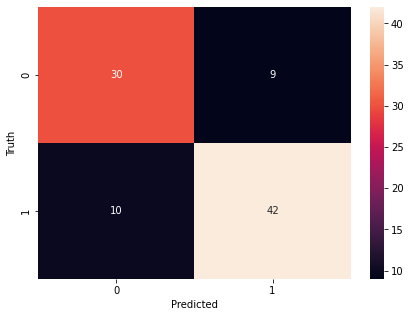

In [73]:
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
print(accuracy_score(y_test,ab_pred))

0.7912087912087912


# GradientBoosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train1,y_train)

GradientBoostingClassifier()

In [76]:
gb_pred = gb.predict(x_test1)
gb_pred 

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [77]:
CM8 = confusion_matrix(y_test,gb_pred)

Text(42.0, 0.5, 'Truth')

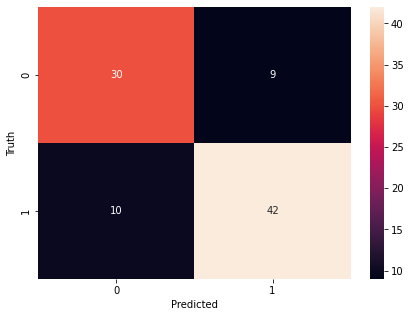

In [78]:
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [79]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        39
           1       0.81      0.83      0.82        52

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [80]:
print(accuracy_score(y_test,gb_pred))

0.7912087912087912


In [81]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT','RF','SVM','XB','AB','GB'],
                          'Accuracy':[accuracy_score(y_test,lr_pred),
                                     accuracy_score(y_test,knn_pred),
                                     accuracy_score(y_test,dtc_pred),
                                     accuracy_score(y_test,rfc_pred),
                                     accuracy_score(y_test,svc_pred),
                                     accuracy_score(y_test,xb_pred),
                                     accuracy_score(y_test,ab_pred),
                                    accuracy_score(y_test,gb_pred)]})

In [82]:
final_data

,Models,Accuracy
0,LR,0.791209
1,KNN,0.846154
2,DT,0.780220
3,RF,0.758242
4,SVM,0.813187
5,XB,0.824176
6,AB,0.791209
7,GB,0.791209


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

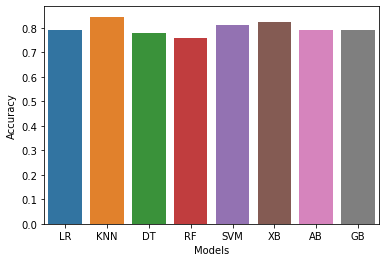

In [83]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

# Save Model Using Joblib

In [84]:
new_patient = ([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

In [85]:
import joblib

In [86]:
joblib.dump(rfc,'model_joblib_heart')

['model_joblib_heart']

In [87]:
model = joblib.load('model_joblib_heart')

In [88]:
model.predict(new_patient)

array([1], dtype=int64)